# test dataset analytics

a set of functions for quickly viewing aggregate properties of a MIDI dataset

## imports

In [14]:
import os
from collections import Counter
import pretty_midi
import matplotlib.pyplot as plt

## functions

In [15]:
def plot_lengths(folder_path):
    """Iterates over all MIDI files in a folder and plots a histogram of their lengths.

    Args:
        folder_path (str): Path to the folder containing MIDI files.
    """
    dur_counter = Counter()
    len_counter = Counter()
    pitch_counter = Counter()
    vel_counter = Counter()

    for file_name in os.listdir(folder_path):
        if file_name.endswith(".mid"):
            file_path = os.path.join(folder_path, file_name)

            try:
                midi_file = pretty_midi.PrettyMIDI(file_path)

                et = midi_file.get_end_time()
                len_counter[et] += 1

                if et > 25:
                    print(f"long boy found w end time {et}: {file_name}")

                midi_data = pretty_midi.PrettyMIDI(file_path)
                for instrument in midi_data.instruments:
                    for note in instrument.notes:
                        pitch_counter[note.pitch] += 1
                        vel_counter[note.velocity] += 1
                        dur_counter[note.end - note.start] += 1

                        if note.end - note.start > 20:
                            print(
                                f"long boy found w note dur {note.end - note.start}: {file_name}"
                            )

            except Exception as e:
                print(f"Error processing {file_path}: {e}")
                continue

    return len_counter, pitch_counter, vel_counter, dur_counter

## go

In [16]:
lc, pc, vc, dc = plot_lengths(
    os.path.join("..", "data", "datasets", "20240606", "play")
)

long boy found w end time 30.147715213636364: 20231228-072-01_0386-0393.mid
long boy found w note dur 23.446960318181816: 20231228-072-01_0386-0393.mid
long boy found w end time 37.92422725454546: 20231228-072-01_0379-0386.mid
long boy found w note dur 31.909078145454547: 20231228-072-01_0379-0386.mid
long boy found w note dur 32.9166535: 20231228-072-01_0379-0386.mid
long boy found w end time 68.32363636363637: 20240305-050-07_0403-0412.mid
long boy found w note dur 61.11272727272728: 20240305-050-07_0403-0412.mid


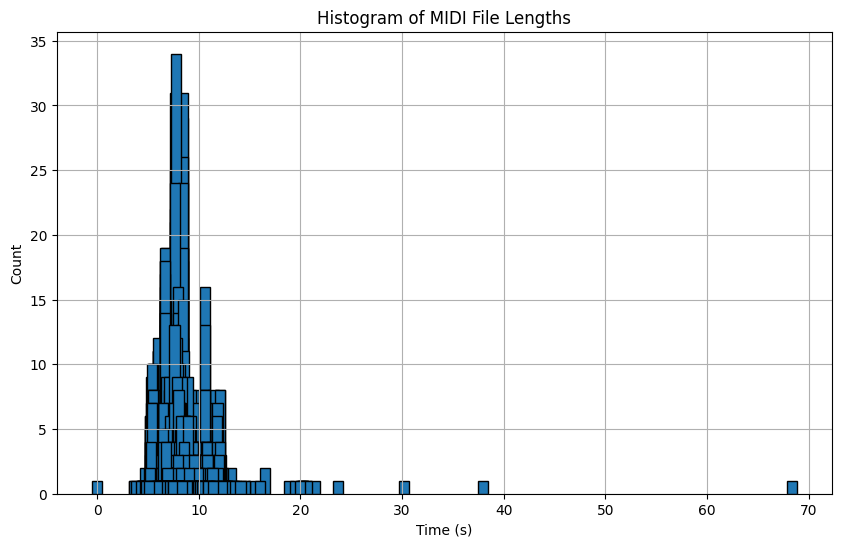

In [17]:
plt.figure(figsize=(10, 6))
plt.bar(list(lc.keys()), list(lc.values()), width=1.0, edgecolor="black")
plt.xlabel("Time (s)")
plt.ylabel("Count")
plt.title("Histogram of MIDI File Lengths")
plt.grid(True)
plt.show()

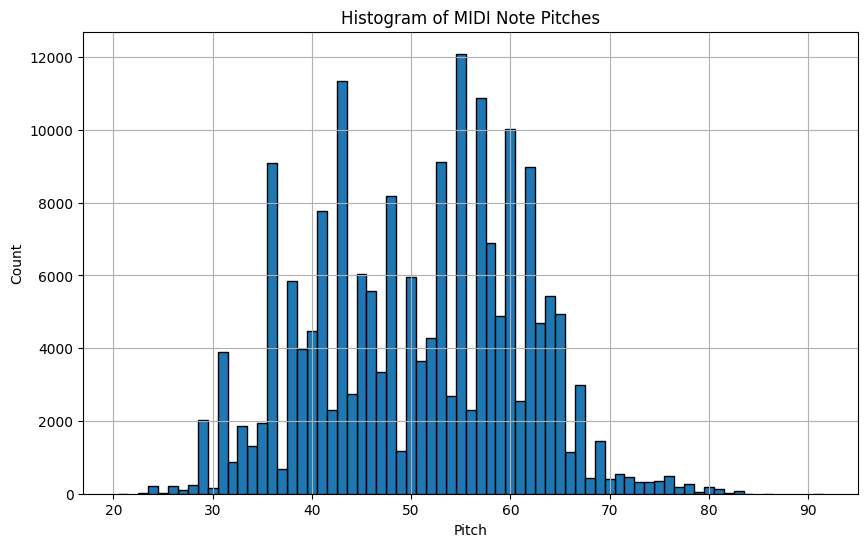

In [18]:
plt.figure(figsize=(10, 6))
plt.bar(list(pc.keys()), list(pc.values()), width=1.0, edgecolor="black")
plt.xlabel("Pitch")
plt.ylabel("Count")
plt.title("Histogram of MIDI Note Pitches")
plt.grid(True)
plt.show()

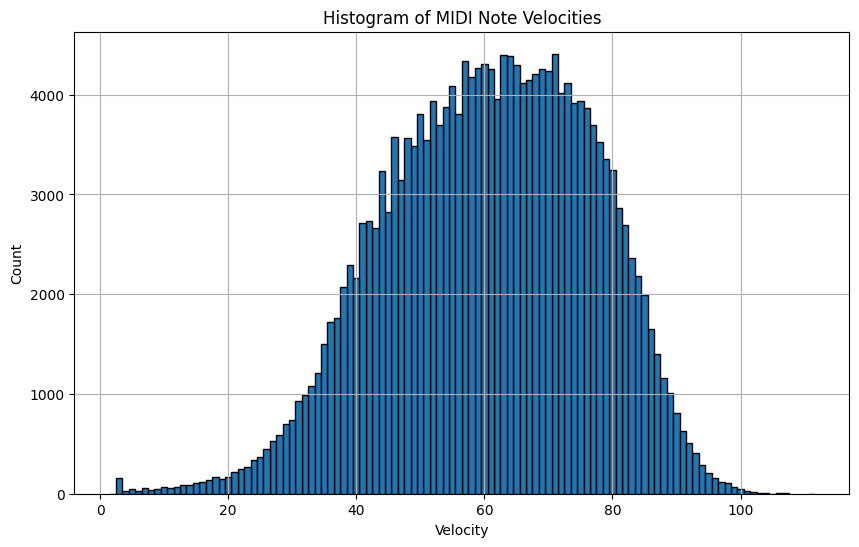

In [19]:
plt.figure(figsize=(10, 6))
plt.bar(list(vc.keys()), list(vc.values()), width=1.0, edgecolor="black")
plt.xlabel("Velocity")
plt.ylabel("Count")
plt.title("Histogram of MIDI Note Velocities")
plt.grid(True)
plt.show()

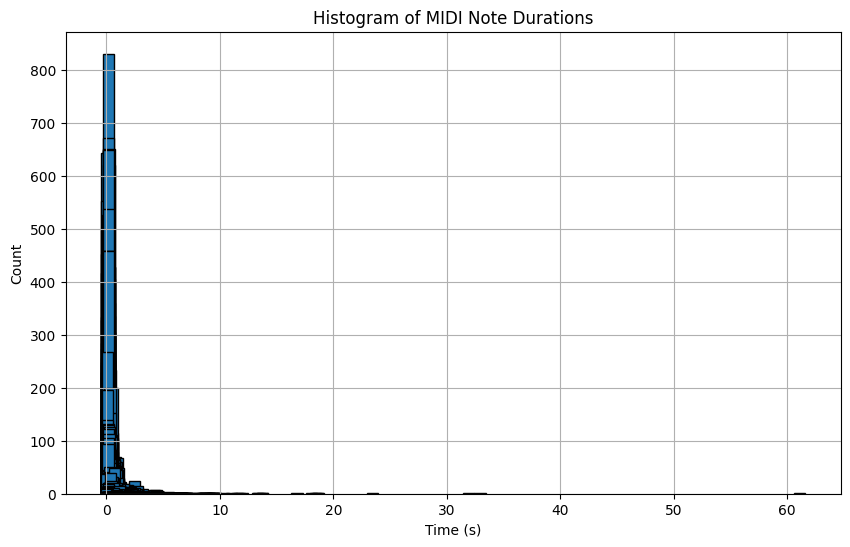

In [20]:
plt.figure(figsize=(10, 6))
plt.bar(list(dc.keys()), list(dc.values()), width=1.0, edgecolor="black")
plt.xlabel("Time (s)")
plt.ylabel("Count")
plt.title("Histogram of MIDI Note Durations")
plt.grid(True)
plt.show()